In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def backward_coupling(matrix):
    time = 0
    lattice = []
    num_states = matrix.shape[0]
    lattice.append(dict([(i, None) for i in range(num_states)]))
    while len(lattice[0]) != 1:
        time += 1
        lattice.append(dict([(i, np.random.choice(num_states, 1, p=matrix[i,:])[0]) \
                             for i in range(num_states)]))
        for t in range(time):
            A = set(lattice[time-t].values())
            B = set(lattice[time-t-1].keys())
            for s in B-A:
                del lattice[time-t-1][s]
    state = list(lattice[0].keys())[0]
    return state, time

def simulate(matrix, num_sims):
    states = {}
    times = {}
    for i in range(num_sims):
        s, t = backward_coupling(matrix)
        if s in states:
            states[s] += 1
        else:
            states[s] = 1
        if t in times:
            times[t] += 1
        else:
            times[t] = 1
    return states, times

In [3]:
# test matrix representing 5 states
A = np.array([[2/3,1/3,0,0,0],
              [1/3,1/3,1/3,0,0],
              [0,1/3,1/3,1/3,0],
              [0,0,1/3,1/3,1/3],
              [0,0,0,1/3,2/3]])

In [4]:
backward_coupling(A)

(1, 21)

In [5]:
states, times = simulate(A, 10000)

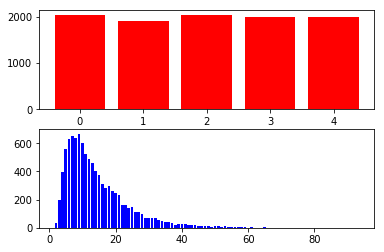

In [6]:
fig = plt.figure()

# states
ax1 = fig.add_subplot(211)
plt.bar(states.keys(), states.values(), color='r')

# times
ax2 = fig.add_subplot(212)
ax2.bar(times.keys(), times.values(), color='b')

plt.show()